In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from pandas import DataFrame


In [2]:
s0 = 68.04
k = s0
r = 0.02
sigma = 0.365515
T = 0.5
t = 1/200
days = int(T*200)

In [3]:
def ST (n):
    price = []

    for i in range(1,n+1):
        st = []
        s = s0
        st.append(s0) #
        for day in range(1,days): 
            s=s*np.exp(((r-0.5*(sigma**2))*t)+sigma*np.sqrt(t)*np.random.normal(0,1))
            st.append(s)
        price.append(st)
    price = pd.DataFrame(price).T
    return price

In [4]:
def FP (STprice):
    final_price = np.array(STprice.iloc[-1:].T).flatten()
    opt = pd.DataFrame({'final_price': final_price})
    opt.insert(1,'call_payoff',"")
    opt.insert(2,'put_payoff',"")
    opt.insert(3,'call_pv',"")
    opt.insert(4,'put_pv',"")
    opt['call_payoff'] = opt['final_price'].apply(lambda x: np.mean(np.maximum(x-k,0)))
    opt['put_payoff'] = opt['final_price'].apply(lambda x: np.mean(np.maximum(k-x,0)))
    opt['call_pv'] = opt['call_payoff'].apply(lambda x: x*np.exp(-r*T))
    opt['put_pv'] = opt['put_payoff'].apply(lambda x: x*np.exp(-r*T))
    opt.drop(opt.head(10).index,inplace=True) 
    return opt

In [5]:
def call(FPprice):
    call_price = FPprice["call_pv"].mean()
    return call_price 

def put(FPprice):
    put_price = FPprice["put_pv"].mean()
    return put_price

In [6]:
def c_option_price(n):
    stprice = ST (n)
    fpprice = FP (stprice)
    call_price = call(fpprice)
    return call_price

In [7]:
def p_option_price(n):
    stprice = ST (n)
    fpprice = FP (stprice)
    put_price = put(fpprice)
    return put_price

In [8]:
#c_option_price(51)
#p_option_price(51)

In [9]:
path = []
CCall = []
PPut = []
for i in range(10,101):
    path.append(i)
    c = c_option_price(i)
    p = p_option_price(i)
    CCall.append(c)
    PPut.append(p)

In [10]:
merge_dt_dict = {'path':path,
                'call':CCall,
                'put':PPut}

data_df = DataFrame(merge_dt_dict)

In [11]:
data_df

,path,call,put
0,10,NaN,NaN
1,11,17.256869,11.764891
2,12,2.412149,0.000000
3,13,0.000000,11.958281
4,14,9.163197,10.059805
...,...,...,...
86,96,8.715434,6.720374
87,97,9.711947,6.445816
88,98,8.047544,7.069059
89,99,6.200639,6.416649


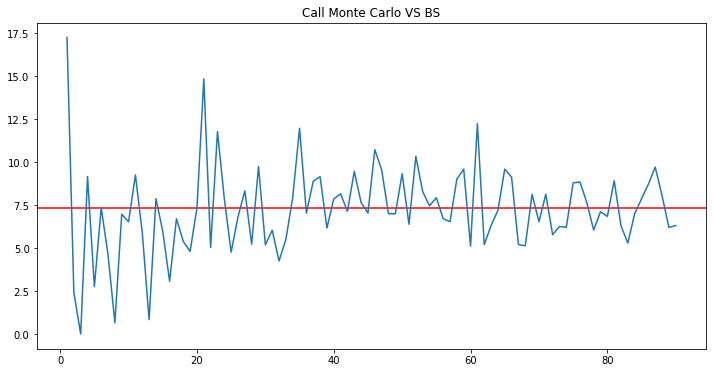

In [29]:
plt.figure(figsize=(12,6))
plt.title('Call Monte Carlo VS BS')
plt.axhline(y=7.30498, color='r', linestyle='-')
plt.plot(data_df['call'])

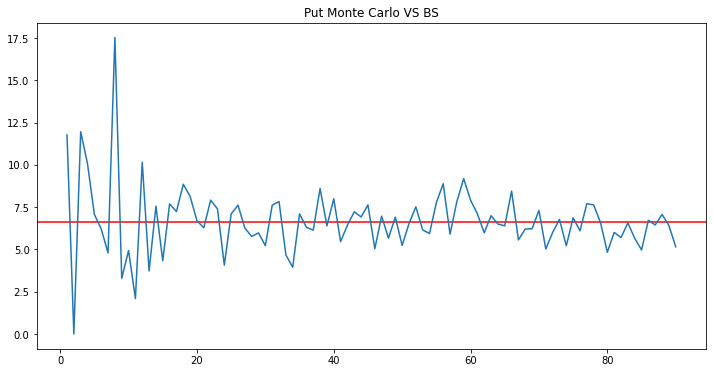

In [30]:
plt.figure(figsize=(12,6))
plt.title('Put Monte Carlo VS BS')
plt.axhline(y=6.62798, color='r', linestyle='-')
plt.plot(data_df['put'])

In [12]:
#price = []

#for i in range(1,101):
#    st = []
#    s = s0
#    st.append(s0) #
#    for day in range(1,days): 
#        s=s*np.exp(((r-0.5*(sigma**2))*t)+sigma*np.sqrt(t)*np.random.normal(0,1))
#        st.append(s)
#    price.append(st)
#price = pd.DataFrame(price).T  

In [13]:
#price

In [14]:
#plt.figure(figsize=(12,6))
#plt.plot(price)
#plt.title('Monte Carlo Stock Price')
#plt.xlabel('Date')
#plt.ylabel('Price')

In [15]:
#final_price = np.array(price.iloc[-1:].T).flatten()
#final_price

In [16]:
#opt = pd.DataFrame({'final_price': final_price})
#opt.insert(1,'call_payoff',"")
#opt.insert(2,'put_payoff',"")
#opt.insert(3,'call_pv',"")
#opt.insert(4,'put_pv',"")

In [17]:
#opt['call_payoff'] = opt['final_price'].apply(lambda x: np.mean(np.maximum(x-k,0)))
#opt['put_payoff'] = opt['final_price'].apply(lambda x: np.mean(np.maximum(k-x,0)))

In [18]:
#opt['call_pv'] = opt['call_payoff'].apply(lambda x: x*np.exp(-r*T))

In [19]:
#opt['put_pv'] = opt['put_payoff'].apply(lambda x: x*np.exp(-r*T))

In [20]:
#opt.drop(opt.head(10).index,inplace=True) 
#opt

In [21]:
#call_price = opt["call_pv"].mean()
#call_price 

In [22]:
#put_price = opt["put_pv"].mean()
#put_price

In [23]:
#opt.plot.scatter(x="final_price",y="call_payoff")
#plt.title('Monte Carlo Call Payoff')
#plt.xlabel('Stiock Price')
#plt.ylabel('Payoff')

In [24]:
#opt.plot.scatter(x="final_price",y="put_payoff")
#plt.title('Monte Carlo Put Payoff')
#plt.xlabel('Stiock Price')
#plt.ylabel('Payoff')

In [25]:
#opt.plot.scatter(x="final_price",y="call_pv")
#plt.axhline(y=0.49816451, color='r', linestyle='-')
#plt.title('Monte Carlo Call Price')
#plt.xlabel('Stiock Price')
#plt.ylabel('Option Price')

In [26]:
#opt.plot.scatter(x="final_price",y="put_pv")
#plt.axhline(y=0.108316996, color='r', linestyle='-')
#plt.title('Monte Carlo Put Price')
#plt.xlabel('Stiock Price')
#plt.ylabel('Option Price')